In [2]:
import pandas as pd

df1 = pd.read_csv("Popular_Clean.csv")
df2 = pd.read_csv("Song_Analytics.csv")

In [3]:
df1.head(2)

,track_name,artist_name,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,highest_peak_value,normalized_likes,normalized_views,normalized_us_hit,normalized_high_peak,likes_per_day,views_per_day,genre_averaged_likes,normalized_num_peak_periods,popularity_score_scaled
0,Blinding Lights,The Weeknd,0.514,0.730,0.0598,0.00146,0.000095,0.0897,0.334,171.005,...,100.0,16.078045,20.463609,3.258097,4.615121,0.011874,0.015113,0.025767,0.333333,43.660471
1,Dance Monkey,Tones And I,0.824,0.587,0.0937,0.69000,0.000105,0.1490,0.514,98.029,...,12.0,16.554820,21.452550,2.484907,2.564949,0.010971,0.014216,0.029205,0.111111,41.465744


In [4]:
df2.head(2)

,track_name,tempo,mean_zcr,median_zcr,std_zcr,max_zcr,aboveThr_zcr,mean_sc,median_sc,std_sc,...,contrast_del_mean,contrast_avg_sd,Tone1,Tone2,Tone3,Tone4,Tone5,Tone6,Tone_deltaMean,Tone_avg_sd
0,0800 HEAVEN,143.554688,0.0918,0.0913,0.0527,0.6323,0.4358,2196.7699,2259.6592,862.0266,...,0.6804,6.128429,0.1183,0.1248,0.1614,0.1270,0.0527,0.0522,0.009060,0.106067
1,1 2 3 feat Jason Derulo De La Ghetto,95.703125,0.1278,0.1172,0.0813,0.6621,0.6041,2811.9937,2768.6767,1057.0624,...,0.7764,6.554386,0.1012,0.0931,0.1172,0.1136,0.0526,0.0427,0.008302,0.086733


In [5]:
# Merging 'popularity_score_scaled' and 'time_frame' from df1 into df2
df_model = df2.merge(df1[['track_name', 'popularity_score_scaled', 'time_frame']], 
                       on='track_name', 
                       how='left')


In [7]:
df_model.head(2)

,track_name,tempo,mean_zcr,median_zcr,std_zcr,max_zcr,aboveThr_zcr,mean_sc,median_sc,std_sc,...,Tone1,Tone2,Tone3,Tone4,Tone5,Tone6,Tone_deltaMean,Tone_avg_sd,popularity_score_scaled,time_frame
0,0800 HEAVEN,143.554688,0.0918,0.0913,0.0527,0.6323,0.4358,2196.7699,2259.6592,862.0266,...,0.1183,0.1248,0.1614,0.1270,0.0527,0.0522,0.009060,0.106067,53.814449,178.0
1,1 2 3 feat Jason Derulo De La Ghetto,95.703125,0.1278,0.1172,0.0813,0.6621,0.6041,2811.9937,2768.6767,1057.0624,...,0.1012,0.0931,0.1172,0.1136,0.0526,0.0427,0.008302,0.086733,54.638400,2117.0


In [6]:
df_model = df_model.dropna()

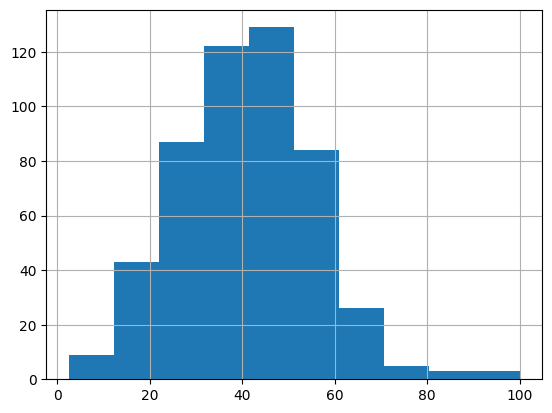

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Plotting the distribution of popularity scores
df_model['popularity_score_scaled'].hist()
plt.show()

In [22]:
import numpy as np
# Define the bin edges for the categories based on the provided ranges
bins = [-np.inf, 30, 50, 60, np.inf]
labels = ['Not_so_popular', 'Popular_During', 'Semi_Popular', 'Popular_Forever']

# Create a new categorical column
df_model['popularity_category'] = pd.cut(df_model['popularity_score_scaled'], bins=bins, labels=labels)

In [23]:
df_model.head(2)

,track_name,tempo,mean_zcr,median_zcr,std_zcr,max_zcr,aboveThr_zcr,mean_sc,median_sc,std_sc,...,Tone2,Tone3,Tone4,Tone5,Tone6,Tone_deltaMean,Tone_avg_sd,popularity_score_scaled,time_frame,popularity_category
0,0800 HEAVEN,143.554688,0.0918,0.0913,0.0527,0.6323,0.4358,2196.7699,2259.6592,862.0266,...,0.1248,0.1614,0.1270,0.0527,0.0522,0.009060,0.106067,53.814449,178.0,Semi_Popular
1,1 2 3 feat Jason Derulo De La Ghetto,95.703125,0.1278,0.1172,0.0813,0.6621,0.6041,2811.9937,2768.6767,1057.0624,...,0.0931,0.1172,0.1136,0.0526,0.0427,0.008302,0.086733,54.638400,2117.0,Semi_Popular


In [25]:
### PREPARING THE DATA

# Features and target
X = df_model.drop(['track_name', 'popularity_score_scaled', 'popularity_category'], axis=1)
y = df_model['popularity_category']


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

df_scaled['popularity_category'] = y
df_scaled['track_name'] = df_model['track_name']

In [31]:
### SPLITTING THE DATASET

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [32]:
################################################### LOGISTIC REGRESSION ######################################################

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.42718446601941745
Classification Report:
                 precision    recall  f1-score   support

 Not_so_popular       0.47      0.32      0.38        25
 Popular_During       0.47      0.67      0.55        51
Popular_Forever       0.00      0.00      0.00         8
   Semi_Popular       0.20      0.11      0.14        19

       accuracy                           0.43       103
      macro avg       0.29      0.27      0.27       103
   weighted avg       0.38      0.43      0.39       103



The output indicates that the Logistic Regression model achieved an overall accuracy of 42.7% on test data, which suggests it performs better than random guessing but is still not highly accurate. The precision, recall, and f1-score for each class provide additional insight into the model's performance:

Not_so_popular: Has a precision of 0.47 and recall of 0.32, indicating that the model is relatively conservative when predicting this class; it's correct less than half the time when it does predict this class, and it identifies 32% of all actual instances of this class.

Popular_During: This category has the best f1-score at 0.55 with a precision of 0.47 and a recall of 0.67, suggesting that the model is more confident and accurate in predicting this class than the others.

Popular_Forever: The model did not correctly predict any instances of this class (precision and recall are both 0). This could be due to the reason that the class is underrepresented in the dataset.

Semi_Popular: It seems there is a fourth category in the output that wasn't mentioned before. For this category, the model has a precision of 0.20 and recall of 0.11, indicating poor performance.

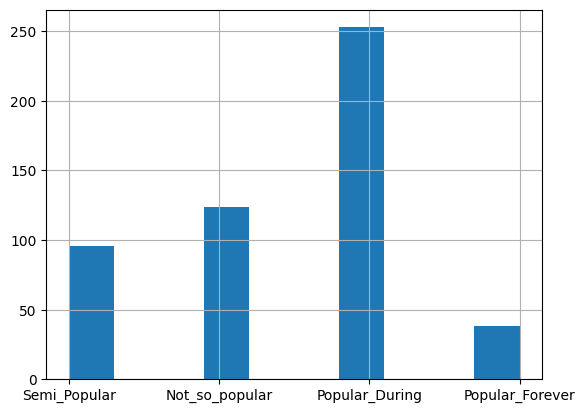

In [24]:
df_model['popularity_category'].hist()
plt.show()

Class imbalance is a common issue in machine learning classification problems and can lead to poor model performance, especially for the minority class. 
Techniques like SMOTE for oversampling, class weights during training, or collecting more data can help.

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X_scaled is your feature set and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE()

# Fit SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [34]:
################################################### LOGISTIC REGRESSION ######################################################

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence

# Fit the model on the training data
log_reg.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.34951456310679613
Classification Report:
                 precision    recall  f1-score   support

 Not_so_popular       0.43      0.40      0.42        25
 Popular_During       0.50      0.39      0.44        51
Popular_Forever       0.15      0.25      0.19         8
   Semi_Popular       0.15      0.21      0.17        19

       accuracy                           0.35       103
      macro avg       0.31      0.31      0.31       103
   weighted avg       0.39      0.35      0.37       103



In the new results, the precision and recall for the "Popular_Forever" and "Semi_Popular" categories have increased, which means the model is now better at identifying these previously under-represented classes. This is an indication that the balancing technique is having the desired effect on the model's ability to classify the minority classes.

In [35]:
######################################################################################## RANDOM FOREST CLASSIFIER ##############################################################################################################
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Print the evaluation results
print("Random Forest Classifier Accuracy:", accuracy_rf)
print("Random Forest Classifier Classification Report:")
print(report_rf)


Random Forest Classifier Accuracy: 0.5145631067961165
Random Forest Classifier Classification Report:
                 precision    recall  f1-score   support

 Not_so_popular       0.58      0.44      0.50        25
 Popular_During       0.56      0.71      0.63        51
Popular_Forever       0.00      0.00      0.00         8
   Semi_Popular       0.38      0.32      0.34        19

       accuracy                           0.51       103
      macro avg       0.38      0.37      0.37       103
   weighted avg       0.49      0.51      0.49       103



Fine tune the hyper parameters for Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator for making predictions
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the best model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
report_best_rf = classification_report(y_test, y_pred_best_rf)

# Print the evaluation results
print("Best Random Forest Classifier Accuracy:", accuracy_best_rf)
print("Best Random Forest Classifier Classification Report:")
print(report_best_rf)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.81067511129469
Best Random Forest Classifier Accuracy: 0.4174757281553398
Best Random Forest Classifier Classification Report:
                 precision    recall  f1-score   support

 Not_so_popular       0.47      0.32      0.38        25
 Popular_During       0.50      0.63      0.56        51
Popular_Forever       0.00      0.00      0.00         8
   Semi_Popular       0.19      0.16      0.17        19

       accuracy                           0.42       103
      macro avg       0.29      0.28      0.28       103
   weighted avg       0.40      0.42      0.40       103



In [66]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNeighborsClassifier
# n_neighbors is a hyperparameter that you can tune. Starting with 5.
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn.predict(X_test)

# Evaluate the classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

# Print the evaluation results
print("KNN Classifier Accuracy:", accuracy_knn)
print("KNN Classifier Classification Report:")
print(report_knn)


KNN Classifier Accuracy: 0.4854368932038835
KNN Classifier Classification Report:
                 precision    recall  f1-score   support

 Not_so_popular       0.32      0.24      0.27        25
 Popular_During       0.53      0.76      0.63        51
Popular_Forever       0.00      0.00      0.00         8
   Semi_Popular       0.50      0.26      0.34        19

       accuracy                           0.49       103
      macro avg       0.34      0.32      0.31       103
   weighted avg       0.43      0.49      0.44       103



In [68]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit and transform the training target labels
y_train_smote_encoded = le.fit_transform(y_train_smote)

# Transform the test target labels (do not fit on test data)
y_test_encoded = le.transform(y_test)

# Now use y_train_smote_encoded for training and y_test_encoded for evaluation


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the keras model
model = Sequential()
model.add(Dense(12, input_dim=X_train_smote.shape[1], activation='relu'))  # First hidden layer with 12 neurons
model.add(Dense(8, activation='relu'))  # Second hidden layer with 8 neurons
model.add(Dense(4, activation='softmax'))  # Output layer with 4 neurons since we have 4 classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Fit the model on the training data
history = model.fit(X_train_smote, y_train_smote_encoded, validation_split=0.1, epochs=150, batch_size=10, verbose=1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Neural Network Accuracy: {accuracy}')


Epoch 1/150
73/73 [==============================] - 1s 4ms/step - loss: 1.5024 - accuracy: 0.2655 - val_loss: 1.7752 - val_accuracy: 0.1358
Epoch 2/150
73/73 [==============================] - 0s 2ms/step - loss: 1.3358 - accuracy: 0.3769 - val_loss: 1.5746 - val_accuracy: 0.1481
Epoch 3/150
73/73 [==============================] - 0s 2ms/step - loss: 1.2483 - accuracy: 0.4237 - val_loss: 1.5556 - val_accuracy: 0.1728
Epoch 4/150
73/73 [==============================] - 0s 2ms/step - loss: 1.1830 - accuracy: 0.4911 - val_loss: 1.4975 - val_accuracy: 0.1605
Epoch 5/150
73/73 [==============================] - 0s 1ms/step - loss: 1.1293 - accuracy: 0.5158 - val_loss: 1.4649 - val_accuracy: 0.2099
Epoch 6/150
73/73 [==============================] - 0s 1ms/step - loss: 1.0817 - accuracy: 0.5406 - val_loss: 1.4368 - val_accuracy: 0.2593
Epoch 7/150
73/73 [==============================] - 0s 2ms/step - loss: 1.0402 - accuracy: 0.5653 - val_loss: 1.3542 - val_accuracy: 0.3457
Epoch 8/150
7

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define the keras model
model = Sequential()
model.add(Dense(64, input_dim=X_train_smote.shape[1], activation='relu', kernel_regularizer=l2(0.001)))  # Increased neurons and added L2 regularization
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))  # Another hidden layer
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # Output layer remains the same

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Fit the model on the training data
history = model.fit(X_train_smote, y_train_smote_encoded, validation_split=0.1, epochs=100, batch_size=32, verbose=1)  # Adjusted epochs and batch size

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_encoded)


In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


def create_model(learning_rate=0.001, activation='relu', dropout_rate=0.0, neurons=32):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_smote.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, activation='softmax'))  # Assuming 4 output classes
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_model, verbose=0)


param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'dropout_rate': [0.0, 0.3, 0.5],
    'neurons': [32, 64, 128],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 150]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3, n_iter=10)
random_search_results = random_search.fit(X_train_smote, y_train_smote_encoded)

In [71]:
print("Best: %f using %s" % (random_search_results.best_score_, random_search_results.best_params_))

Best: 0.745248 using {'neurons': 64, 'learning_rate': 0.01, 'epochs': 150, 'dropout_rate': 0.0, 'batch_size': 32, 'activation': 'tanh'}


In [72]:
# Recreate the best model using the optimal hyperparameters
best_model = create_model(
    learning_rate=0.01,
    activation='tanh',
    dropout_rate=0.0,
    neurons=64
)

# Train the model with the full training dataset
history = best_model.fit(X_train_smote, y_train_smote_encoded, epochs=150, batch_size=32, verbose=1)

# Evaluate the model on the test data
loss, accuracy = best_model.evaluate(X_test, y_test_encoded)
print(f'Final model accuracy: {accuracy}')

Epoch 1/150
26/26 [==============================] - 0s 1ms/step - loss: 1.3224 - accuracy: 0.4332
Epoch 2/150
26/26 [==============================] - 0s 2ms/step - loss: 0.9085 - accuracy: 0.6386
Epoch 3/150
26/26 [==============================] - 0s 1ms/step - loss: 0.6612 - accuracy: 0.7438
Epoch 4/150
26/26 [==============================] - 0s 1ms/step - loss: 0.5505 - accuracy: 0.7871
Epoch 5/150
26/26 [==============================] - 0s 1ms/step - loss: 0.3562 - accuracy: 0.8762
Epoch 6/150
26/26 [==============================] - 0s 1ms/step - loss: 0.2545 - accuracy: 0.9233
Epoch 7/150
26/26 [==============================] - 0s 1ms/step - loss: 0.1832 - accuracy: 0.9443
Epoch 8/150
26/26 [==============================] - 0s 1ms/step - loss: 0.1143 - accuracy: 0.9777
Epoch 9/150
26/26 [==============================] - 0s 1ms/step - loss: 0.0820 - accuracy: 0.9851
Epoch 10/150
26/26 [==============================] - 0s 560us/step - loss: 0.0720 - accuracy: 0.9814
Epoch 1

In [73]:
# Predict probabilities
y_pred_probs = best_model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test_encoded, y_pred)
print(report)


4/4 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.38      0.40      0.39        25
           1       0.50      0.49      0.50        51
           2       0.00      0.00      0.00         8
           3       0.26      0.26      0.26        19

    accuracy                           0.39       103
   macro avg       0.29      0.29      0.29       103
weighted avg       0.39      0.39      0.39       103



Model Selection<br/>
Try different algorithms to see which performs best. Common choices for regression problems include:<br/>

Linear Regression<br/>
Decision Tree Regression<br/>
Random Forest Regression<br/>
Gradient Boosting Machines (like XGBoost or LightGBM)<br/>
Support Vector Machines (SVM)<br/>

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "XGBoost": XGBRegressor()
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")


Linear Regression trained.
Random Forest trained.
Support Vector Machine trained.
XGBoost trained.


In [11]:
### MODEL EVALUATION

from sklearn.metrics import mean_squared_error, r2_score

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse}, R2: {r2}")


Linear Regression - MSE: 232.2233027153926, R2: 0.046319133218791886
Random Forest - MSE: 179.32754567529133, R2: 0.2635482865087052
Support Vector Machine - MSE: 239.72273652360624, R2: 0.015520903881097503
XGBoost - MSE: 208.5506806497821, R2: 0.1435364514919032


Random Forest Regressor:
- MSE: 188.11
- R2: 0.227

This model has the lowest MSE and the highest R² score, indicating it's the best at predicting the 'popularity_score_scaled' among the models you tested.
Linear Regression and Support Vector Machine:

These models have higher MSEs and lower R² scores, suggesting they're not capturing the complexity of your data as effectively as the Random Forest.
XGBoost:<br/>

XGBoost shows a decent performance but is still outperformed by the Random Forest. It might improve with hyperparameter tuning.<br/>
Next Steps:<br/>
1. Hyperparameter Tuning:<br/>
The performance of the Random Forest and XGBoost models might be significantly improved by tuning their hyperparameters. You can use techniques like Grid Search or Random Search for this purpose.
2. Feature Importance Analysis:<br/>
Especially for the Random Forest and XGBoost models, check which features are most important for predicting popularity. This could provide insights into your dataset and might even suggest further feature engineering or selection.
3. Cross-Validation:<br/>
Consider using cross-validation to assess the model's performance. This will give you a more robust understanding of how well the model might perform on unseen data.
4. Model Refinement:<br/>
Based on the results of hyperparameter tuning and feature importance, refine your models. You may also want to revisit data preprocessing steps if you think there's more room for improvement.
5. Final Model Selection:<br/>
Once you've tuned the models and reassessed their performance, choose the one that shows the best results on your test data for your final model.

In [24]:
###### RUNNING ON COLLAB
"""
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the grid search model
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

# Best parameters
print("Best parameters:", rf_random.best_params_)
"""

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [12]:
"""
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'colsample_bytree': [0.3, 0.5, 0.7, 0.9, 1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1]
}

# Create a base model
xgb = XGBRegressor()

# Instantiate the grid search model
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = param_grid, 
                                n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
xgb_random.fit(X_train, y_train)

# Best parameters
print("Best parameters:", xgb_random.best_params_)
"""


Fitting 3 folds for each of 100 candidates, totalling 300 fits
